In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import matplotlib.animation as animation
import glob, re

import scienceplots
plt.style.use('default')
plt.style.use(['science', 'high-vis'])

In [3]:
DIR = "../build/"
files = glob.glob(DIR + "BV_list_*.csv")

def extract_donors(filename):
    donor = re.findall(r'\d+\.?\d*e?\+?\-?\d*', filename)
    return float(donor[0])

../build/BV_list_1.00e+15.csv
../build/BV_list_1.00e+18.csv
../build/BV_list_1.00e+16.csv
../build/BV_list_1.00e+17.csv
../build/BV_list_1.00e+19.csv


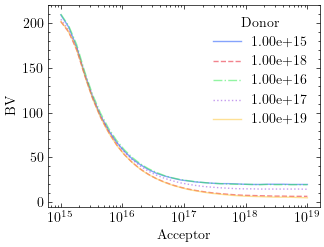

In [4]:
fig, ax = plt.subplots()
for file in files:
    print(file)
    Acceptor, BV = np.loadtxt(file, delimiter=',', unpack=True, skiprows=1)
    donor = extract_donors(file)
    ax.plot(Acceptor, BV, label="{:.2e}".format(donor), alpha=0.5)
ax.set_xscale('log')
ax.set_xlabel('Acceptor')
ax.set_ylabel('BV')
ax.legend(title="Donor")
plt.show()
fig.savefig(f"{DIR}/BV_for_manyy_acceptors_donors.png", dpi=300)

In [8]:
Acceptor, LengthIntrinsic, BV = np.loadtxt(DIR + "BV_list.csv", delimiter=',', unpack=True, skiprows=1)

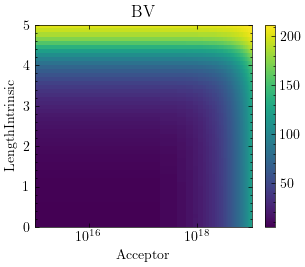

In [25]:
# Heat map of BV
Acceptors = np.unique(Acceptor)
LengthIntrinsics = np.unique(LengthIntrinsic)
BV = BV.reshape(len(Acceptors), len(LengthIntrinsics))
STEP = len(Acceptors) // 4

extent = [Acceptors[0], Acceptors[-1], LengthIntrinsics[0], LengthIntrinsics[-1]]
fig, ax = plt.subplots()
im = ax.imshow(BV, extent=extent, aspect='auto')
ax.set_xscale('log')
ax.set_xlabel('Acceptor')
ax.set_ylabel('LengthIntrinsic')
ax.set_title('BV')
fig.colorbar(im, ax=ax)
plt.show()
